In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def phi(x):
    F = np.sin(2 * np.pi * x) * np.cos(5 * np.pi * x)*np.exp(x) - 2*np.cos(7*np.pi*x)*np.sin(np.pi*x)
    return F

In [50]:
def gaussian(x1, x2, l = 1/9):
    f = np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * l ** 2))
    return f

In [51]:
N = 12
R=0.5
e = 1.25*R / np.sqrt(N)

In [52]:
def multiquadratic(x1,x2 ,e=1):
  F = (e**2+np.linalg.norm(x1-x2)**2)**(-1/2)

  return F

In [53]:
def multiquadratic2(x1,x2 ,e=1):
  d= x1-x2
  if d.ndim ==1:
    d=np.expand_dims(d,axis=1)
  F = (e**2+np.linalg.norm(d,axis=1)**2)**(-1/2)

  return F

In [54]:
def kernel_matrix(X,e=1,  f = multiquadratic):
    G = np.zeros([len(X), len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            G[i, j] = f(X[i], X[j],e)
    return G

In [55]:
def rbf_model(G, d):
    m = np.dot(np.linalg.inv(G), d)
    return m

In [56]:
def rbf_predict(x, X, m, e=1, f = multiquadratic2):

    S = np.zeros(len(x))
    for i in range(len(m)):
        S = S + m[i] * f(x, X[i],e)
    return S

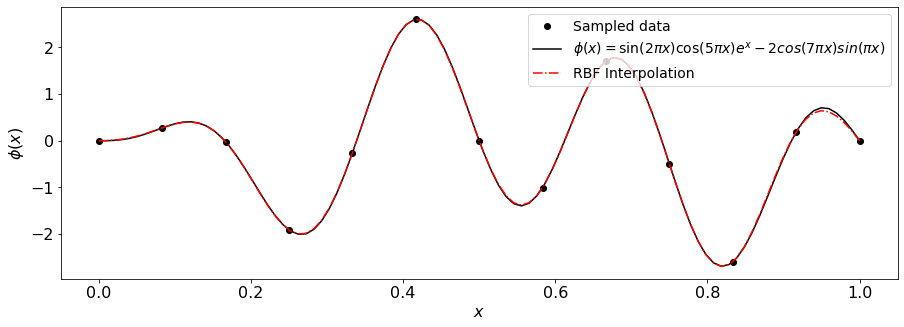

In [57]:
# Sample 10 values of X and phi.

X = np.arange(0, N + 1, 1) / N
d = phi(X)
# Gaussian length scale.
L = 1 / 9
# Calculate the kernel matrix G
G = kernel_matrix(X, e, multiquadratic)

# Invert d = Gm for the model parameters.
m = rbf_model(G, d)
# Using m, interpolate phi for all values in x ∈ [0, 1].
x = np.linspace(0, 1, 100)
S = rbf_predict(x, X, m, e,  multiquadratic2)
# Plot the results.
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, S, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)e^x-2cos(7\pi x)sin(\pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [58]:
from scipy.interpolate import Rbf

In [59]:
print(len(X))
print(len(d))

13
13


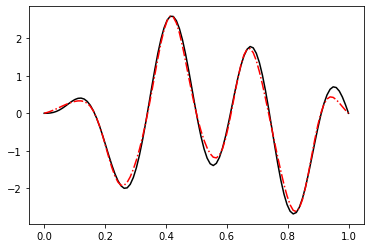

In [60]:
l_x = Rbf(X,d,function='inverse')
pred = l_x(x)
plt.plot(x, phi(x), "k")
plt.plot(x, pred, "r-.") 

In [61]:
ndim=1
M =G
temp = np.ones(N+1)
temp = np.expand_dims(temp,axis=1)
xx = np.expand_dims(X,axis=1)
M=np.concatenate([M,xx,temp],axis=1)
temp = np.concatenate([xx,temp],axis=1)
temp = np.transpose(temp)
null = np.zeros((ndim+1,ndim+1))
temp = np.concatenate([temp,null],axis=1)
M = np.concatenate([M,temp],axis=0)
temp.shape

(2, 15)

In [62]:
def kernel(X,e):
  N = len(X)
  ndim = X.ndim
  M = kernel_matrix(X, e,  multiquadratic)
  temp = np.ones(N)
  temp = np.expand_dims(temp,axis=1)
  if ndim==1:
    xx = np.expand_dims(X,axis=1)
  else:
    xx = X
  M=np.concatenate([M,xx,temp],axis=1)
  temp = np.concatenate([xx,temp],axis=1)
  temp = np.transpose(temp)
  null = np.zeros((ndim+1,ndim+1))
  temp = np.concatenate([temp,null],axis=1)
  M = np.concatenate([M,temp],axis=0) 
  return M

In [63]:
dd = d
for i in range(ndim+1):
  dd=np.append(dd,0)
dd.shape
abc=np.dot(np.linalg.inv(M), dd)
a = abc[:N+1]
a.shape
b = abc[N+1:N+ndim+1]
c = abc[-1]

In [64]:
c

0.3430098665972352

In [65]:
def predict(x, X, a,b,c, e, f = multiquadratic2, cheat =False):
    S = np.array([np.dot(b,x[i])+c for i in range(len(x))])
    S=np.squeeze(S)
    for i in range(len(a)):
        S = S + a[i] * f(x, X[i],e)
    if cheat:
      S = [min(abs(S[i]),1) for i in range(len(x))]
    return S

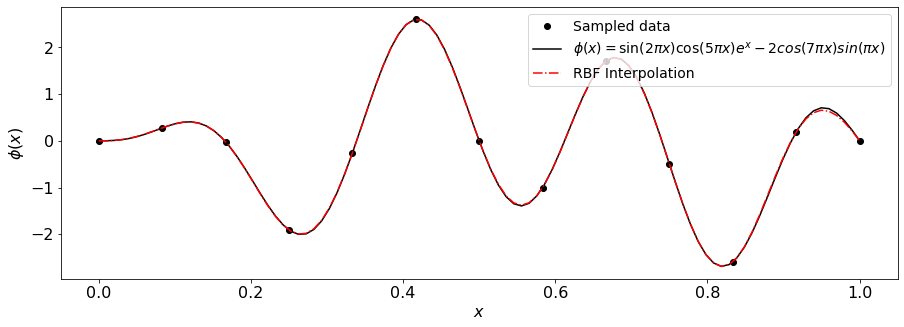

In [66]:
#SS = predict(x, X, a,b,c,  multiquadratic2)
l = lambda x: predict(x, X, a,b,c, e, multiquadratic2, cheat =False)
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, l(x), "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)e^x-2cos(7\pi x)sin(\pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [67]:
from pyDOE import lhs

In [68]:
wall_up = [0.0, 0.41] + [1.1, 0.0] * lhs(2, 20)
wall_lw = [0.0, 0.00] + [1.1, 0.0] * lhs(2, 22)

In [69]:
r = 0.05
theta = [0.0] + [np.pi] * lhs(1, 20)
x_CYLD = np.multiply(r, np.cos(theta))+0.2
y_CYLD = np.multiply(r, np.sin(theta))+0.2
CYLD = np.concatenate((x_CYLD, y_CYLD), 1) 

theta2 = [np.pi] + [2*np.pi] * lhs(1, 20)
x_CYLD2 = np.multiply(r, np.cos(theta2))+0.2
y_CYLD2 = np.multiply(r, np.sin(theta2))+0.2
CYLD2 = np.concatenate((x_CYLD2, y_CYLD2), 1) 

In [70]:
OUTLET = [1.1, 0.0] + [0.0, 0.41] * lhs(2, 20)
INLET = [0.0, 0.0] + [0.0, 0.41] * lhs(2, 20)

In [71]:
def get_target(n,m):
  a = np.zeros(n)
  b = np.ones(m)
  return np.concatenate([a,b],axis=0)

In [72]:
sample_1 = np.concatenate([wall_up,wall_lw],axis=0)
N=len(sample_1)
R=0.55
e = 1.25*R / np.sqrt(N)

target = get_target(len(wall_up),len(wall_lw))
M1 = kernel(sample_1,e)
ndim = sample_1.ndim
for i in range(ndim+1):
  target=np.append(target,0)

abc=np.dot(np.linalg.inv(M1), target)
a = abc[:N]
a.shape
b = abc[N:N+ndim]
c = abc[-1]

In [73]:
R=0.55

In [74]:
def length_function(gamma1,gamma2):
  sample_1 = np.concatenate([gamma1,gamma2],axis=0)
  N=len(sample_1)
  e = 1.25*R / np.sqrt(N)
  target = get_target(len(gamma1),len(gamma2))
  M1 = kernel(sample_1,e)
  ndim = sample_1.ndim
  for i in range(ndim+1):
    target=np.append(target,0)

  abc=np.dot(np.linalg.inv(M1), target)
  a = abc[:N]
  #a.shape
  b = abc[N:N+ndim]
  c = abc[-1]

  l1 = lambda x: predict(x, sample_1, a,b,c, e, multiquadratic2,cheat = True)
  
  return l1


In [75]:
def DelCylPT(XY_c, xc=0.0, yc=0.0, r=0.1):
    '''
    delete points within cylinder
    '''
    dst = np.array([((xy[0] - xc) ** 2 + (xy[1] - yc) ** 2) ** 0.5 for xy in XY_c])
    return XY_c[dst>r,:]

In [76]:
lb = np.array([0, 0])
ub = np.array([1.1, 0.41])
XY_c = lb + (ub - lb) * lhs(2, 40000)
XY_c_refine = [0.1, 0.1] + [0.2, 0.2] * lhs(2, 10000)
XY_c = np.concatenate((XY_c, XY_c_refine), 0)
XY_c = DelCylPT(XY_c, xc=0.2, yc=0.2, r=0.05)

In [77]:
l1 = length_function(wall_up,CYLD)
l2 = length_function(CYLD,OUTLET)
l3 = length_function(wall_lw,CYLD2)
l4 = length_function(CYLD2,INLET)
mu=4
area=1-np.power(np.add(1,np.negative(l1(XY_c))),mu)
area = np.multiply(area,1-np.power(np.add(1,np.negative(l2(XY_c))),mu))
area = np.multiply(area,1-np.power(np.add(1,np.negative(l3(XY_c))),mu))
area = np.multiply(area,1-np.power(np.add(1,np.negative(l4(XY_c))),mu))

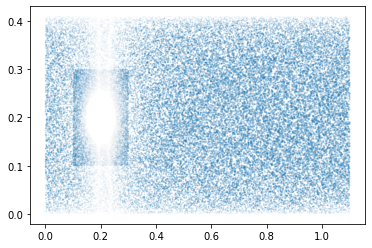

In [78]:
plt.scatter(XY_c[:,0:1], XY_c[:,1:2],area,marker='o',alpha=0.2)
plt.show()